In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# carregando os dados
crimes_df = pd.read_csv('CrimesOnWomenData.csv')

# Visualização das 5 primeiras linhas
print("CrimesOnWomenData.csv - First 5 Rows:")
print(crimes_df.head())


CrimesOnWomenData.csv - First 5 Rows:
   Unnamed: 0              State  Year  Rape   K&A   DD   AoW   AoM    DV  WT
0           0     ANDHRA PRADESH  2001   871   765  420  3544  2271  5791   7
1           1  ARUNACHAL PRADESH  2001    33    55    0    78     3    11   0
2           2              ASSAM  2001   817  1070   59   850     4  1248   0
3           3              BIHAR  2001   888   518  859   562    21  1558  83
4           4       CHHATTISGARH  2001   959   171   70  1763   161   840   0


In [46]:
nome_colunas = {
    'Year': 'Anos',
    'Rape': 'Crimes de Estupro',
    'K&A': 'Sequestro e agressão',
    'DD': 'Mortes por Dote',
    'AoW': 'Agressão Contra Mulher',
    'AoM': 'Agressão contra Minorias',
    'DV': 'Violencia Domestica',
    'WT': 'Bruxaria'
}

# Renomeando as colunas
crimes_df.rename(columns=nome_colunas, inplace=True)

# Check the renamed columns
print("\nRenamed Columns:")
print(crimes_df.columns)


Renamed Columns:
Index(['Unnamed: 0', 'State', 'Anos', 'Crimes de Estupro',
       'Sequestro e agressão', 'Mortes por Dote', 'Agressão Contra Mulher',
       'Agressão contra Minorias', 'Violencia Domestica', 'Bruxaria'],
      dtype='object')


In [47]:
# Excluindo colunas desnecessãrias
crimes_df_cleaned = crimes_df.drop(columns=['Unnamed: 0'])


print(crimes_df_cleaned.columns)

print(crimes_df_cleaned.head())

Index(['State', 'Anos', 'Crimes de Estupro', 'Sequestro e agressão',
       'Mortes por Dote', 'Agressão Contra Mulher', 'Agressão contra Minorias',
       'Violencia Domestica', 'Bruxaria'],
      dtype='object')
               State  Anos  Crimes de Estupro  Sequestro e agressão  \
0     ANDHRA PRADESH  2001                871                   765   
1  ARUNACHAL PRADESH  2001                 33                    55   
2              ASSAM  2001                817                  1070   
3              BIHAR  2001                888                   518   
4       CHHATTISGARH  2001                959                   171   

   Mortes por Dote  Agressão Contra Mulher  Agressão contra Minorias  \
0              420                    3544                      2271   
1                0                      78                         3   
2               59                     850                         4   
3              859                     562                        21   

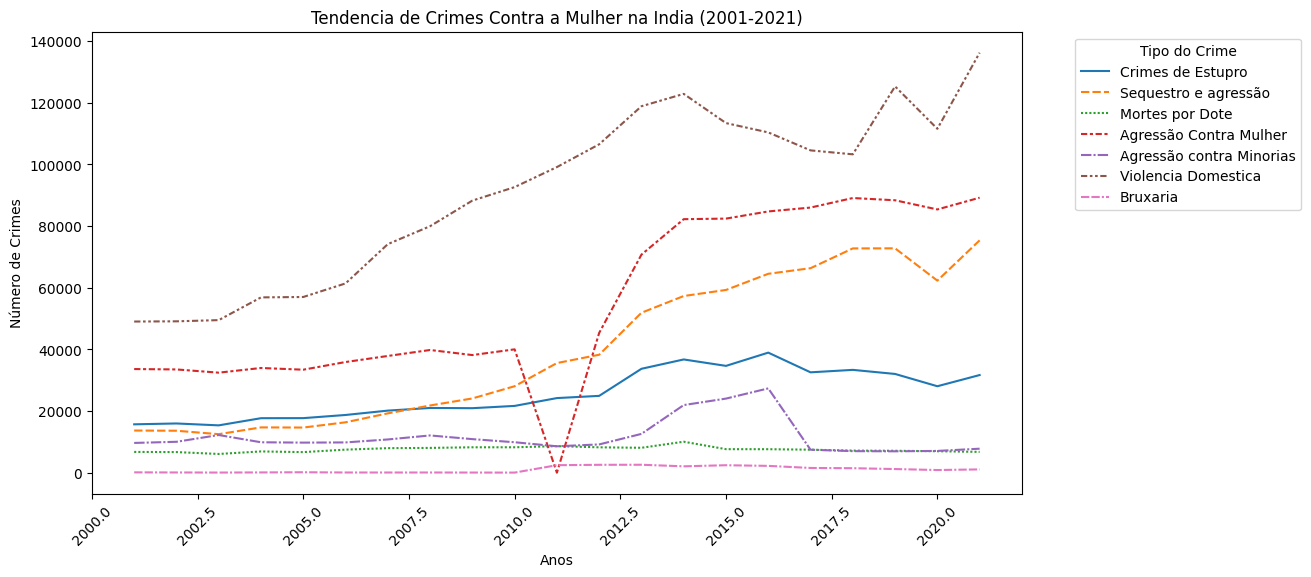

In [48]:
# Soma total de crimes e separando por grupos
crime_trend = crimes_df_cleaned.groupby('Anos').sum()

# Visualização dos crimes ao longo dos anos
plt.figure(figsize=(12, 6))
sns.lineplot(data=crime_trend)
plt.title('Tendencia de Crimes Contra a Mulher na India (2001-2021)')
plt.xlabel('Anos')
plt.ylabel('Número de Crimes')
plt.xticks(rotation=45)
plt.legend(title='Tipo do Crime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

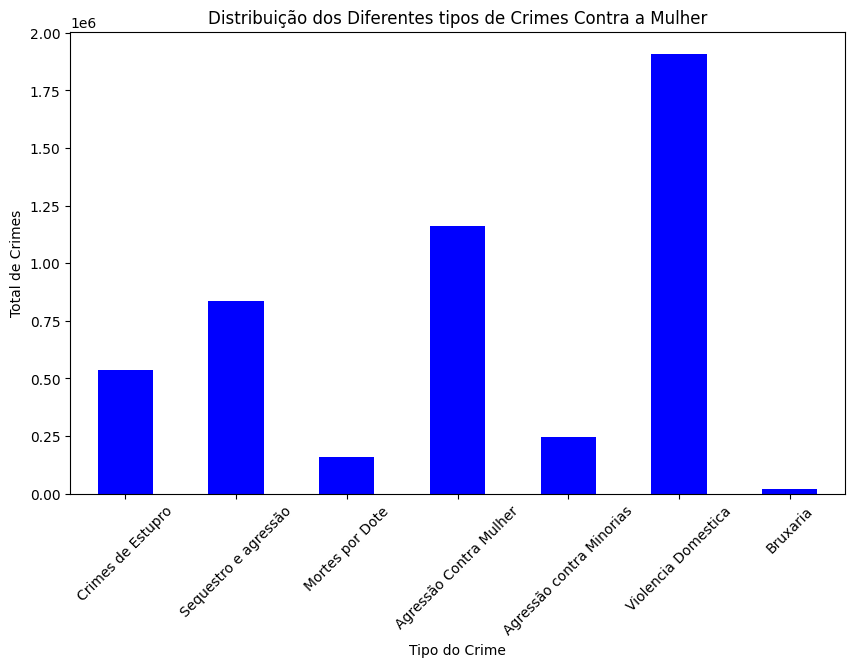

In [53]:
crime_distribution =crimes_df_cleaned.drop(['State', 'Anos'], axis=1).sum()

plt.figure(figsize=(10, 6))
crime_distribution.plot(kind='bar', color='blue')
plt.title('Distribuição dos Diferentes tipos de Crimes Contra a Mulher')
plt.xlabel('Tipo do Crime')
plt.ylabel('Total de Crimes')
plt.xticks(rotation=45)
plt.show()

<Figure size 1400x800 with 0 Axes>

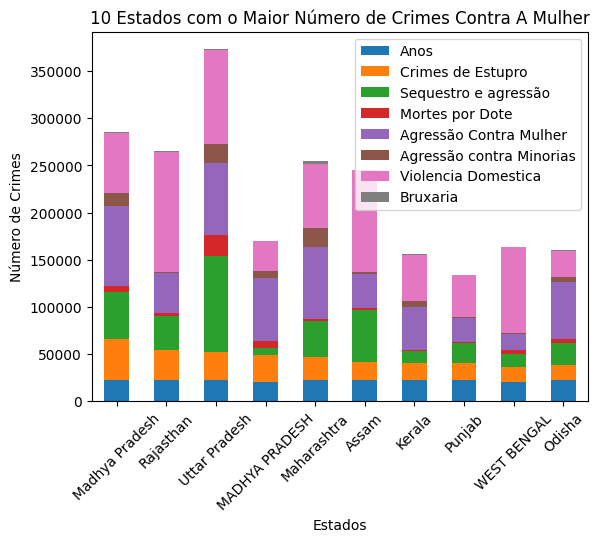

In [49]:
# Total de crimes por estado
state_crime = crimes_df_cleaned.groupby('State').sum().sort_values(by='Crimes de Estupro', ascending=False)

# Top 10 estados com maior numero de crimes
top_states = state_crime.head(10)

plt.figure(figsize=(14, 8))
top_states.plot(kind='bar', stacked=True)
plt.title('10 Estados com o Maior Número de Crimes Contra A Mulher')
plt.xlabel('Estados')
plt.ylabel('Número de Crimes')
plt.xticks(rotation=45)
plt.show()

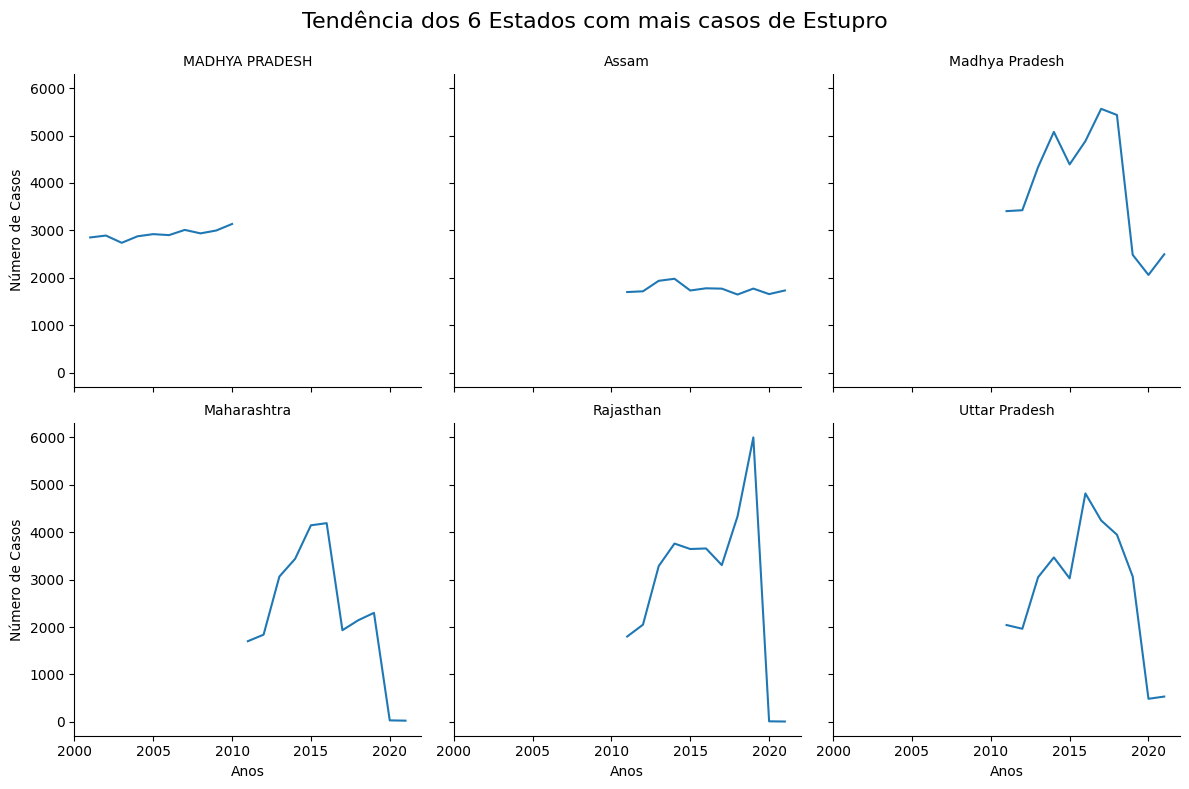

In [76]:
top_n_states = crimes_df_cleaned.groupby('State').sum().nlargest(6, 'Crimes de Estupro').index

filtered_df = crimes_df_cleaned[crimes_df_cleaned['State'].isin(top_n_states)]

tendencia = sns.FacetGrid(filtered_df, col="State", col_wrap=3, height=4)
tendencia.map(sns.lineplot, 'Anos', 'Crimes de Estupro')
tendencia.set_titles("{col_name}")
tendencia.set_axis_labels("Anos", "Número de Casos")
plt.subplots_adjust(top=0.9)
tendencia.fig.suptitle('Tendência dos 6 Estados com mais casos de Estupro', fontsize=16)
plt.show()

In [62]:
fig = px.scatter(crimes_df_cleaned,
                 x='Violencia Domestica',
                 y='Crimes de Estupro',
                 title="Correlação entre Violencia Domestica e Estupro",
                 labels={'Violencia Domestica': 'Casos de Violencia Domestica', 'Crimes de Estupro': 'Crimes de Estupro'},
                 trendline='ols',
                 trendline_color_override="red")

fig.update_traces(marker=dict(size=10, opacity=0.7, line=dict(width=1, color='DarkSlateGrey')))
fig.show()

Insights:  Após realizarmos a análise exploratória dos dados, ficou clara em como a violência doméstica aumentou muito ao longo dos anos tendo assim junto um aumento quase que igual de Agressão Contra a Mulher.
Analisando esses fatos, fiz uma correlação dos casos de violência doméstica e estupro e conseguimos identificar que conforme os casos de violência doméstica cresciam, os casos de estupro acompanhou este crescimento.
Foi possível notar uma queda significativa nos casos de Estrupo em alguns estados, porém o crescimento alarmante em 4 estados dos 6 com maiores tendencias de casos de estupro.
Porém, prosseguindo pro anos de 2020-2021 houve uma queda significativa nesses mesmos 6 estados com a maior tendencia e média desse crime. Não consegui apura ao certo, mas provavelmente tenha relação com a escassez de dados durante o peírodo da pandemia.